In [14]:
%config Completer.use_jedi = False

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as LA

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Planar Flow

$g(\mathbf{z}) = \mathbf{z} + \mathbf{u}h(\mathbf{w}^T\mathbf{z} + b)$


$\theta = \{\mathbf{u,w} \in \mathbb{R}^d, b \in \mathbb{R}\}$

In [15]:
w = np.array([5., 0])
u = np.array([1., 0])
b = 0

def h(x):
    return np.tanh(x)

def g(z, w=w, u=u, b=b):
    y = z + np.dot(h(np.dot(z, w) + b).reshape(-1,1), u.reshape(1,-1))
    return y

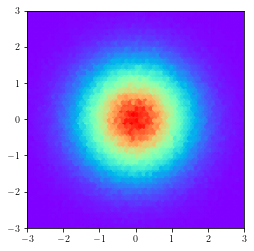

In [16]:
z = np.random.normal(size=(int(1e6),2))
plt.hexbin(z[:,0], z[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

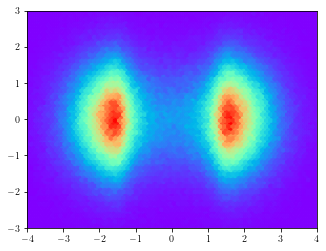

In [17]:
x = g(z)
plt.hexbin(x[:,0], x[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.show()

## Radial Flow

$g(\mathbf{z}, \theta) = \mathbf{z} + \beta h(\alpha,r)(\mathbf{z}-\mathbf{z}_0)$

$\theta = \{\alpha \in \mathbb{R}^{+}, \beta \in \mathbb{R}, \mathbf{z}_0 \in \mathbb{R}^{d} \}$

$r = ||\mathbf{z} - \mathbf{z}_0||$

$h(\alpha, r) = \dfrac{1}{\alpha + r}$

In [18]:
z0 = np.array([1, 0])
a = 2
b = 5

def h(r,a):
    return 1/(a+r)

def g(z, z0=z0, a=a, b=b):
    r = LA.norm(z - z0, axis=1).reshape(-1, 1)
    y = z + b * h(r,a) * (z - z0)
    return y

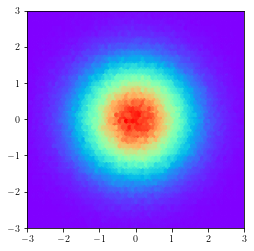

In [19]:
z = np.random.normal(size=(int(1e6),2))
plt.hexbin(z[:,0], z[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

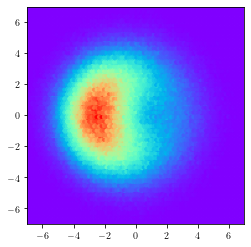

In [23]:
x = g(z)
plt.hexbin(x[:,0], x[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()